## Explore the original dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.graph_objects as go



# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format


# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
chronic = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI___2023_Release.csv')
chronic = chronic.loc[:, ~chronic.columns.str.contains('^Unnamed')]    # got this code from chatgpt, we had a bunch of read and save code for the same csv causing a new column 'unamed' to be created everytime the code runs

chronic.head(10)



/var/folders/r2/lrt3k8v16s31pd1zj8fwq1vr0000gn/T/ipykernel_43153/3303932593.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  chronic = pd.read_csv('U.S._Chronic_Disease_Indicators__CDI___2023_Release.csv')


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
5,2020,2020,AL,Alabama,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,1,ALC,ALC1_2,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
6,2015,2015,DE,Delaware,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,10,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
7,2019,2019,FL,Florida,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,12,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
8,2018,2018,KS,Kansas,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,20,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
9,2013,2013,MS,Mississippi,PRAMS,Alcohol,Alcohol use before pregnancy,NaN,%,Crude Prevalence,...,28,ALC,ALC1_2,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [2]:
print("The size of the dataframe is:", chronic.shape)

The size of the dataframe is: (1185676, 34)


In [3]:
print(chronic.columns)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


In [4]:
print(chronic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [5]:
print(chronic.dtypes)

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
QuestionID                    object
D

## Visualization of the original dataset


Visulization of the Topic column

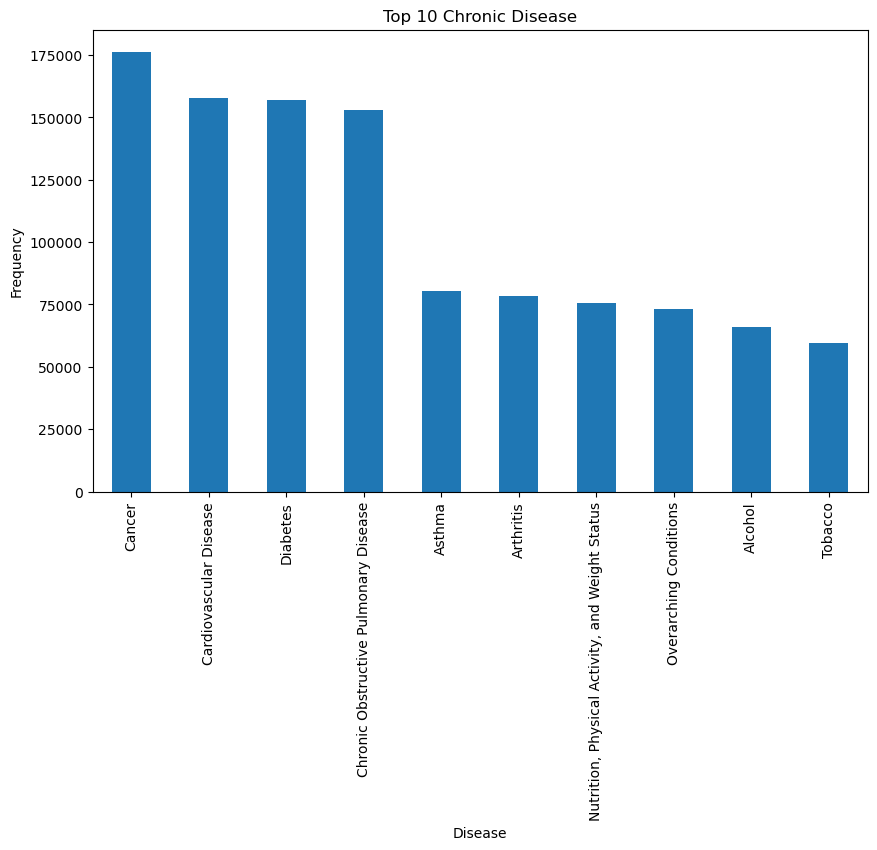

In [6]:
# Get the top ten most frequent chronic disease
top_topics = chronic['Topic'].value_counts().nlargest(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_topics.plot(kind='bar')
plt.title('Top 10 Chronic Disease')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.show()

Visulization of the Stratification column

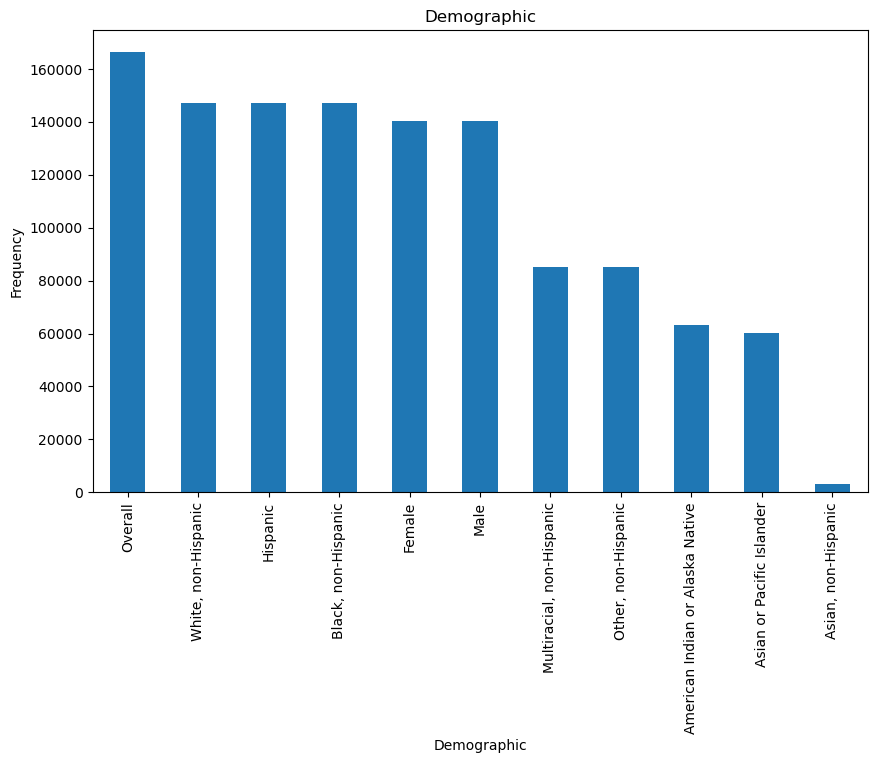

In [7]:
demographic = chronic['Stratification1'].value_counts()
# Create the bar chart
plt.figure(figsize=(10, 6))
demographic.plot(kind='bar')
plt.title('Demographic')
plt.xlabel('Demographic')
plt.ylabel('Frequency')
plt.show()


Value count of the Location, DataValueType, LocationDesc, YearStart, YearEnd

In [8]:
chronic["LocationDesc"].value_counts()

Wisconsin               22556
New York                22556
New Jersey              22550
Nebraska                22518
Iowa                    22510
Vermont                 22490
Washington              22457
New Mexico              22457
Michigan                22422
Hawaii                  22420
Colorado                22417
West Virginia           22407
Arkansas                22384
Kentucky                22375
Utah                    22352
Oregon                  22352
Massachusetts           22349
North Carolina          22346
Maryland                22346
Florida                 22311
Rhode Island            22273
Arizona                 22271
South Dakota            22264
Nevada                  22241
South Carolina          22235
Missouri                22163
Illinois                22157
Alaska                  22157
Pennsylvania            22157
Delaware                22151
Maine                   22142
Wyoming                 22140
New Hampshire           22104
Mississipp

In [9]:
chronic['DataValueType'].value_counts()
#Shows that each number has a different meaning. 

Crude Prevalence                                                    370903
Age-adjusted Prevalence                                             282080
Number                                                              105407
Age-adjusted Rate                                                   102457
Crude Rate                                                          102457
Average Annual Number                                                53248
Average Annual Crude Rate                                            53248
Average Annual Age-adjusted Rate                                     53248
Mean                                                                 24145
Age-adjusted Mean                                                    23925
Median                                                                7200
Percent                                                               2741
Yes/No                                                                2102
US Dollars               

In [10]:
chronic['LocationDesc'].unique()


array(['Oregon', 'Arizona', 'Ohio', 'United States', 'Virgin Islands',
       'Alabama', 'Delaware', 'Florida', 'Kansas', 'Mississippi',
       'New Jersey', 'Pennsylvania', 'South Dakota', 'Vermont', 'Alaska',
       'Arkansas', 'Colorado', 'Connecticut', 'District of Columbia',
       'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Indiana', 'Kentucky',
       'Louisiana', 'Massachusetts', 'Maine', 'Michigan', 'Minnesota',
       'Missouri', 'Montana', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Mexico', 'Nevada', 'New York', 'Oklahoma', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Washington', 'Wisconsin', 'West Virginia', 'Wyoming',
       'California', 'North Carolina', 'Guam', 'Illinois', 'Puerto Rico',
       'Maryland'], dtype=object)

In [11]:
chronic['YearStart'].describe()


count   1,185,676.00
mean        2,015.10
std             3.32
min         2,001.00
25%         2,013.00
50%         2,015.00
75%         2,018.00
max         2,021.00
Name: YearStart, dtype: float64

In [12]:
chronic['YearEnd'].describe()


count   1,185,676.00
mean        2,015.64
std             3.00
min         2,001.00
25%         2,013.00
50%         2,016.00
75%         2,018.00
max         2,021.00
Name: YearEnd, dtype: float64

Clean up the GeoLocation column

## Focus on Cancer only diseases

In [13]:
cancer_only = chronic[chronic['Topic'] == 'Cancer']

print(cancer_only.shape)

cancer_only['Question'].value_counts().sort_index()

(176339, 34)


Cancer of the colon and rectum (colorectal), incidence                                  9984
Cancer of the colon and rectum (colorectal), mortality                                  9984
Cancer of the female breast, mortality                                                  9984
Cancer of the female cervix, mortality                                                  9984
Cancer of the lung and bronchus, incidence                                              9984
Cancer of the lung and bronchus, mortality                                              9984
Cancer of the oral cavity and pharynx, mortality                                        9984
Cancer of the prostate, mortality                                                       9984
Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years    5220
Invasive cancer (all sites combined), incidence                                         9984
Invasive cancer (all sites combined), mortality                       

# Invasive vs Noninvasive_mortality

In [14]:
invasive = cancer_only[cancer_only['Question'].str.contains('invasive', case = False)]

noninvasive_mortality = cancer_only[cancer_only['Question'].str.contains('mortality', case = False)]


noninvasive_mortality.head()


# noninvasive_mortality.to_csv('noninvasive_mortality.csv', index=False)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
281,2010,2014,IL,Illinois,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,17,CAN,CAN10_2,AVGANNNMBR,GENDER,GENF,NaN,NaN,NaN,NaN
282,2012,2016,MN,Minnesota,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,27,CAN,CAN10_2,AVGANNNMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
283,2009,2013,NC,North Carolina,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,37,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN
284,2009,2013,ND,North Dakota,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,38,CAN,CAN10_2,AVGANNNMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
285,2010,2014,SC,South Carolina,Death Certificate,Cancer,"Cancer of the oral cavity and pharynx, mortality",NaN,NaN,Average Annual Number,...,45,CAN,CAN10_2,AVGANNNMBR,GENDER,GENM,NaN,NaN,NaN,NaN


In [15]:
print(noninvasive_mortality['Question'].unique().tolist())

substrings = ['oral cavity', 'melanoma', 'colon', 'lung']
cancers = '|'.join(substrings)

noninvasive_mortality_non_gender = noninvasive_mortality[noninvasive_mortality['Question'].str.contains(cancers, case = False, regex = True)]

noninvasive_mortality_non_gender['Question'].value_counts()




['Cancer of the oral cavity and pharynx, mortality', 'Cancer of the prostate, mortality', 'Invasive cancer (all sites combined), mortality', 'Melanoma, mortality', 'Cancer of the female breast, mortality', 'Cancer of the female cervix, mortality', 'Cancer of the colon and rectum (colorectal), mortality', 'Cancer of the lung and bronchus, mortality']


Cancer of the oral cavity and pharynx, mortality          9984
Melanoma, mortality                                       9984
Cancer of the colon and rectum (colorectal), mortality    9984
Cancer of the lung and bronchus, mortality                9984
Name: Question, dtype: int64

In [16]:
# noninvasive_mortality_non_gender.to_csv('noninvasive_mortality_non_gender.csv', index=False)

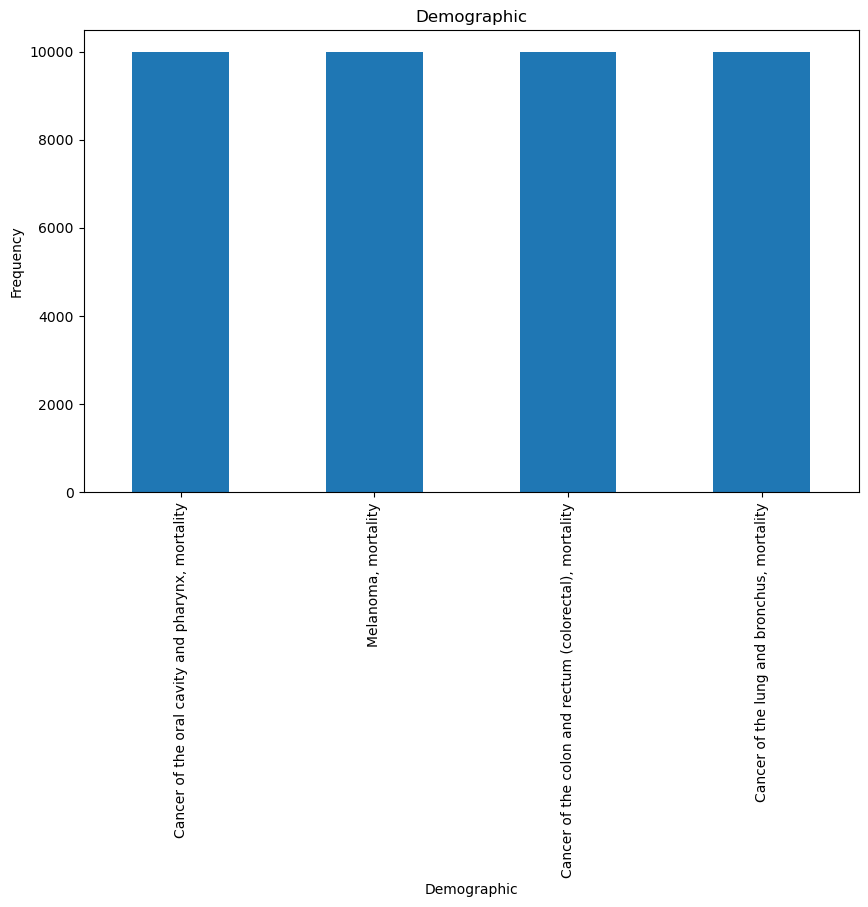

In [17]:
cancer_type = noninvasive_mortality_non_gender['Question'].value_counts()

plt.figure(figsize=(10, 6))
cancer_type.plot(kind='bar')
plt.title('Demographic')
plt.xlabel('Demographic')
plt.ylabel('Frequency')
plt.show()

**Project 2 - Initial Data Cleaning**

Loading the Chronic Disease Indicator CSV file as 'CDI'.

Checking the shape of the DataFrame shows that we have over 1,000,000 entries with 34 columns.

In [18]:
chronic.shape

(1185676, 34)

Checking all the columns contained in the DataFrame.

In [19]:
chronic.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

Checking the number of null entries by column. Output shows that 10 columns are completely empty.

In [20]:
chronic.isnull().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

Dropping the columns that only contain 'NaN' values. 

In [21]:
CDI_drop = chronic.dropna(axis=1,how='all')
CDI_drop.shape

(1185676, 24)

Checking the columns that remain after dropping those containing only null values.

In [22]:
CDI_drop.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'GeoLocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

Due to the large amount of data in this dataset, we decided to narrow our foucs to cancer. 
This section drops the rows that don't have 'Cancer' as the 'Topic'.

In [23]:
CDI_cancer = CDI_drop.drop(CDI_drop[CDI_drop['Topic'] != 'Cancer'].index, axis=0)
CDI_cancer.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
264,2013,2017,AK,Alaska,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,62,...,NaN,Gender,Male,POINT (-147.72205903599973 64.84507995700051),2,CAN,CAN10_1,AVGANNNMBR,GENDER,GENM
265,2014,2018,AK,Alaska,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,84,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,CAN,CAN10_1,AVGANNNMBR,OVERALL,OVR
266,2009,2013,CT,Connecticut,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,325,...,NaN,Gender,Male,POINT (-72.64984095199964 41.56266102000046),9,CAN,CAN10_1,AVGANNNMBR,GENDER,GENM
267,2014,2018,CT,Connecticut,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,46,...,NaN,Race/Ethnicity,Hispanic,POINT (-72.64984095199964 41.56266102000046),9,CAN,CAN10_1,AVGANNNMBR,RACE,HIS
268,2008,2012,DC,District of Columbia,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,73,...,NaN,Overall,Overall,POINT (-77.036871 38.907192),11,CAN,CAN10_1,AVGANNNMBR,OVERALL,OVR


The shape of the new dataframe containing only the topics for Cancer shows that we have 176,339 entries.

In [24]:
CDI_cancer.shape

(176339, 24)

After checking for the number of remaining entries that have a null datavalue, it was determined that the 'DatavalueFootnote' column contianed useful information for these entries such as "Data not shown because of too few respondents or cases" or "The state registry opted not to present state-specific estimates for this race/ethnicity group". 

In [25]:
CDI_cancer['DataValue'].isnull().sum()

45717

In [26]:
CDI_cancer.head().T

,264,265,266,267,268
YearStart,2013,2014,2009,2014,2008
YearEnd,2017,2018,2013,2018,2012
LocationAbbr,AK,AK,CT,CT,DC
LocationDesc,Alaska,Alaska,Connecticut,Connecticut,District of Columbia
DataSource,Statewide central cancer registries,Statewide central cancer registries,Statewide central cancer registries,Statewide central cancer registries,Statewide central cancer registries
Topic,Cancer,Cancer,Cancer,Cancer,Cancer
Question,"Invasive cancer of the oral cavity or pharynx,...","Invasive cancer of the oral cavity or pharynx,...","Invasive cancer of the oral cavity or pharynx,...","Invasive cancer of the oral cavity or pharynx,...","Invasive cancer of the oral cavity or pharynx,..."
DataValueUnit,NaN,NaN,NaN,NaN,NaN
DataValueType,Average Annual Number,Average Annual Number,Average Annual Number,Average Annual Number,Average Annual Number
DataValue,62,84,325,46,73


* Only include non-gender cancer

In [27]:
non_gender_substrings = ['oral cavity', 'melanoma', 'colon', 'lung']
non_gender_cancers = '|'.join(non_gender_substrings)

non_gender = CDI_cancer[(CDI_cancer['Question'].str.contains(non_gender_cancers, case = False, regex = True)) 
                         & (~CDI_cancer['Question'].str.contains('test'))]

non_gender['Question'].value_counts().sort_index()

Cancer of the colon and rectum (colorectal), incidence      9984
Cancer of the colon and rectum (colorectal), mortality      9984
Cancer of the lung and bronchus, incidence                  9984
Cancer of the lung and bronchus, mortality                  9984
Cancer of the oral cavity and pharynx, mortality            9984
Invasive cancer of the oral cavity or pharynx, incidence    9984
Invasive melanoma, incidence                                9984
Melanoma, mortality                                         9984
Name: Question, dtype: int64

In [28]:
non_gender['DataValueType'].value_counts()

Average Annual Number               26624
Average Annual Crude Rate           26624
Average Annual Age-adjusted Rate    26624
Name: DataValueType, dtype: int64

In [29]:
non_gender['StratificationCategory1'].value_counts()

Race/Ethnicity    49920
Gender            19968
Overall            9984
Name: StratificationCategory1, dtype: int64

In [30]:
non_gender['LocationDesc'].unique()
# Question are these all states?

array(['Alaska', 'Connecticut', 'District of Columbia', 'Hawaii', 'Idaho',
       'Kentucky', 'Louisiana', 'Massachusetts', 'New Hampshire',
       'New Mexico', 'Oklahoma', 'Pennsylvania', 'Illinois', 'Minnesota',
       'North Carolina', 'North Dakota', 'South Carolina', 'South Dakota',
       'United States', 'Virginia', 'West Virginia', 'Arizona', 'Iowa',
       'Washington', 'Maryland', 'Maine', 'Michigan', 'Nevada',
       'New York', 'Oregon', 'Rhode Island', 'Texas', 'Utah', 'Vermont',
       'Wyoming', 'Alabama', 'California', 'Colorado', 'Delaware',
       'Florida', 'Kansas', 'Missouri', 'Montana', 'Ohio', 'Wisconsin',
       'Georgia', 'Mississippi', 'Arkansas', 'Nebraska', 'New Jersey',
       'Tennessee', 'Indiana'], dtype=object)

* Focus on 2 types of cancer based on the total annual number in recent time period

In [31]:
non_gender['DataValueAlt'].fillna(0,inplace= True)
non_gender['YearPeriod'] = non_gender.YearStart.astype(str) + '-' + non_gender.YearEnd.astype(str)
(non_gender[non_gender.DataValueType == 'Average Annual Number']
 .groupby(['Question','YearPeriod'])['DataValueAlt']
 .agg(np.sum)
 .unstack()
 .sort_values(by = '2015-2019',ascending = False))

# Since Lung and bronchus, and colon and rectum are 2 cancers with highest incidence numbers in latest period 2015-2019,
# we decide to focus our analysis on these 2 cancers

/var/folders/r2/lrt3k8v16s31pd1zj8fwq1vr0000gn/T/ipykernel_43153/1917430037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_gender['DataValueAlt'].fillna(0,inplace= True)
/var/folders/r2/lrt3k8v16s31pd1zj8fwq1vr0000gn/T/ipykernel_43153/1917430037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_gender['YearPeriod'] = non_gender.YearStart.astype(str) + '-' + non_gender.YearEnd.astype(str)


YearPeriod,2008-2012,2009-2013,2010-2014,2011-2015,2012-2016,2013-2017,2014-2018,2015-2019
Question,,,,,,,,
"Cancer of the lung and bronchus, incidence","1,280,739.00","1,284,498.00","1,289,454.00","1,301,506.00","1,313,249.00","1,323,694.00","1,328,104.00","1,327,328.00"
"Cancer of the lung and bronchus, mortality","935,001.00","932,184.00","929,127.00","923,747.00","914,157.00","900,537.00","883,884.00","865,127.00"
"Cancer of the colon and rectum (colorectal), incidence","840,570.00","831,690.00","830,760.00","835,425.00","841,216.00","847,210.00","850,664.00","849,619.00"
"Invasive melanoma, incidence","394,834.00","407,581.00","422,857.00","442,310.00","459,853.00","478,561.00","490,653.00","499,590.00"
"Cancer of the colon and rectum (colorectal), mortality","308,024.00","306,801.00","306,588.00","307,003.00","307,615.00","308,860.00","309,318.00","309,662.00"
"Invasive cancer of the oral cavity or pharynx, incidence","232,831.00","239,516.00","247,097.00","255,108.00","262,362.00","269,364.00","274,592.00","278,263.00"
"Cancer of the oral cavity and pharynx, mortality","49,670.00","50,664.00","52,420.00","53,932.00","55,717.00","57,146.00","58,690.00","59,994.00"
"Melanoma, mortality","53,688.00","54,583.00","54,744.00","54,411.00","53,300.00","51,880.00","50,475.00","49,033.00"


In [32]:
lung_cancer = non_gender[non_gender['Question'].str.contains('lung')]
lung_cancer.shape
lung_cancer.Question.unique()


array(['Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality'], dtype=object)

In [33]:
colon = non_gender[non_gender['Question'].str.contains('colon')]
colon.shape
colon.Question.unique()

array(['Cancer of the colon and rectum (colorectal), incidence',
       'Cancer of the colon and rectum (colorectal), mortality'],
      dtype=object)

* Explore the Colon Cancer

1. Whole US W/O Gender or Race cut

In [34]:
colon_us_overall=(colon[(colon.LocationDesc == 'United States') & (colon.StratificationCategory1 == 'Overall')& (colon.DataValueType != 'Average Annual Crude Rate')]
.loc[:,['Question','YearPeriod','DataValueType','DataValue']]
.pivot_table(index='YearPeriod', columns=['Question','DataValueType'], values='DataValue'))
colon_us_overall

Question      Cancer of the colon and rectum (colorectal), incidence  \
DataValueType                       Average Annual Age-adjusted Rate   
YearPeriod                                                             
2008-2012                                                  42.40       
2009-2013                                                  41.10       
2010-2014                                                  40.20       
2011-2015                                                  39.60       
2012-2016                                                  39.10       
2013-2017                                                  38.70       
2014-2018                                                  38.20       
2015-2019                                                  37.60       

Question                             \
DataValueType Average Annual Number   
YearPeriod                            
2008-2012                142,181.00   
2009-2013                140,681.00   
2010-2014                140,528.00   
2011-2015                141,323.00   
2012-2016                142,322.00   
2013-2017                143,358.00   
2014-2018                144,003.00   
2015-2019                143,872.00   

Question      Cancer of the colon and rectum (colorectal), mortality  \
DataValueType                       Average Annual Age-adjusted Rate   
YearPeriod                                                             
2008-2012                                                  15.50       
2009-2013                                                  15.10       
2010-2014                                                  14.80       
2011-2015                                                  14.50       
2012-2016                                                  14.20       
2013-2017                                                  14.00       
2014-2018                                                  13.70       
2015-2019                                                  13.40       

Question                             
DataValueType Average Annual Number  
YearPeriod                           
2008-2012                 52,009.00  
2009-2013                 51,800.00  
2010-2014                 51,761.00  
2011-2015                 51,831.00  
2012-2016                 51,932.00  
2013-2017                 52,138.00  
2014-2018                 52,208.00  
2015-2019                 52,257.00

Visualize the total incidence and mortaity rate over time

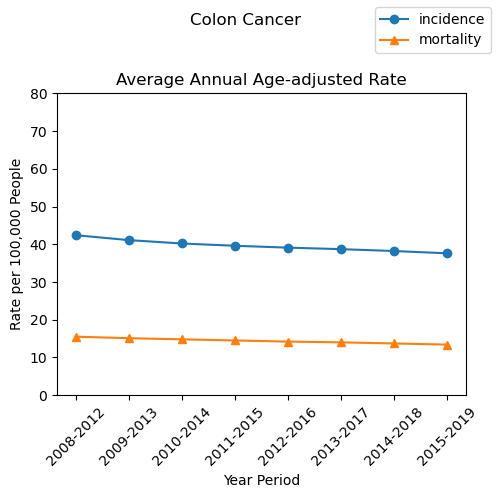

In [35]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

# # Plot Average Annual Number
# axes[0].plot(colon_us_overall['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'], marker='o', label='incidence')
# axes[0].plot(colon_us_overall['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'], marker='o', label='mortality')
# axes[0].set_title('Average Annual Number')
# axes[0].set_ylabel('Count')
# axes[0].set_xlabel('Year Period')
# axes[0].tick_params(axis='x', rotation=45)
# axes[0].grid(True)
# axes[0].set_ylim(0, max(colon_us_overall['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'].max(), colon_us_overall['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'].max()) * 1.1)

# Plot Average Annual Age-adjusted Rate
axes.plot(colon_us_overall['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Age-adjusted Rate'], marker='o', label='incidence')
axes.plot(colon_us_overall['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Age-adjusted Rate'], marker='^', label='mortality')
axes.set_title('Average Annual Age-adjusted Rate')
axes.set_ylabel('Rate per 100,000 People')
axes.set_xlabel('Year Period')
axes.tick_params(axis='x', rotation=45)
# axes.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.3f}%'))
# axes[1].grid(True)
axes.set_ylim(0, 80)

# Add main title
fig.suptitle('Colon Cancer', fontsize=12)

# Add legend only showing "mortality" and "incidence"
handles, labels = axes.get_legend_handles_labels()
filtered_handles = []
filtered_labels = []
for handle, label in zip(handles, labels):
    if 'incidence' in label or 'mortality' in label:
        filtered_handles.append(handle)
        filtered_labels.append(label)
fig.legend(filtered_handles, filtered_labels)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

2. Whole US With Gender cut

In [36]:
colon_us_gender=(colon[(colon.LocationDesc == 'United States') & (colon.StratificationCategory1 == 'Gender')& (colon.DataValueType != 'Average Annual Crude Rate')]
.loc[:,['Question','YearPeriod','Stratification1','DataValueType','DataValue']]
.pivot_table(index='YearPeriod', columns=['Stratification1','Question','DataValueType'], values='DataValue'))
colon_us_gender

Stratification1                                                 Female  \
Question        Cancer of the colon and rectum (colorectal), incidence   
DataValueType                         Average Annual Age-adjusted Rate   
YearPeriod                                                               
2008-2012                                                    37.00       
2009-2013                                                    35.90       
2010-2014                                                    35.10       
2011-2015                                                    34.60       
2012-2016                                                    34.30       
2013-2017                                                    33.90       
2014-2018                                                    33.60       
2015-2019                                                    33.00       

Stratification1                        \
Question                                
DataValueType   Average Annual Number   
YearPeriod                              
2008-2012                   68,576.00   
2009-2013                   67,602.00   
2010-2014                   67,249.00   
2011-2015                   67,312.00   
2012-2016                   67,697.00   
2013-2017                   68,027.00   
2014-2018                   68,192.00   
2015-2019                   67,986.00   

Stratification1                                                         \
Question        Cancer of the colon and rectum (colorectal), mortality   
DataValueType                         Average Annual Age-adjusted Rate   
YearPeriod                                                               
2008-2012                                                    13.10       
2009-2013                                                    12.70       
2010-2014                                                    12.40       
2011-2015                                                    12.20       
2012-2016                                                    12.00       
2013-2017                                                    11.80       
2014-2018                                                    11.50       
2015-2019                                                    11.30       

Stratification1                        \
Question                                
DataValueType   Average Annual Number   
YearPeriod                              
2008-2012                   25,113.00   
2009-2013                   24,845.00   
2010-2014                   24,740.00   
2011-2015                   24,723.00   
2012-2016                   24,656.00   
2013-2017                   24,676.00   
2014-2018                   24,599.00   
2015-2019                   24,540.00   

Stratification1                                                   Male  \
Question        Cancer of the colon and rectum (colorectal), incidence   
DataValueType                         Average Annual Age-adjusted Rate   
YearPeriod                                                               
2008-2012                                                    49.00       
2009-2013                                                    47.40       
2010-2014                                                    46.30       
2011-2015                                                    45.70       
2012-2016                                                    44.90       
2013-2017                                                    44.30       
2014-2018                                                    43.70       
2015-2019                                                    43.00       

Stratification1                        \
Question                                
DataValueType   Average Annual Number   
YearPeriod                              
2008-2012                   73,605.00   
2009-2013                   73,079.00   
2010-2014                   73,279.00   
2011-2015                   74,012.00   
2012-2016          

A. Incidence vs Mortality

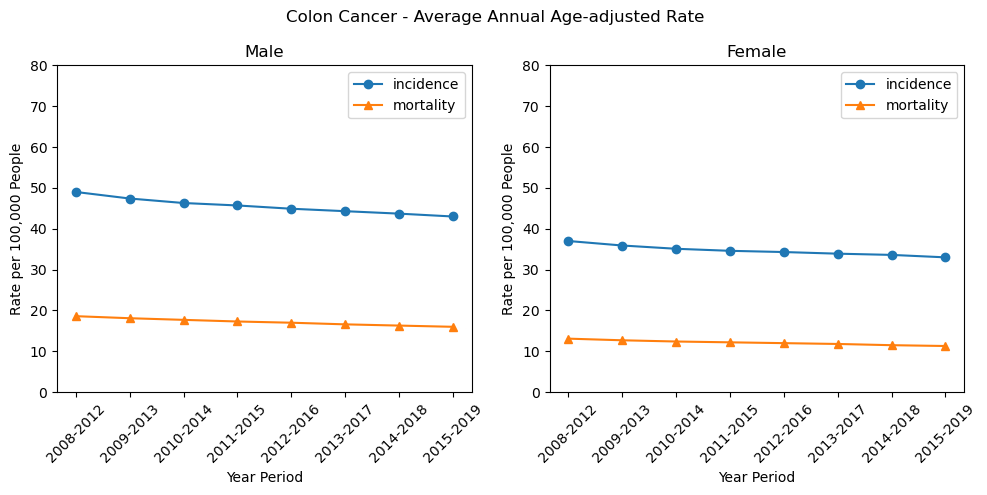

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Female
# # Plot Average Annual Number
# axes[0][0].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'], marker='o', label='incidence')
# axes[0][0].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'], marker='o', label='mortality')
# axes[0][0].set_title('Female - Average Annual Number')
# axes[0][0].set_ylabel('Count')
# axes[0][0].set_xlabel('Year Period')
# axes[0][0].tick_params(axis='x', rotation=45)
# axes[0][0].grid(True)
# axes[0][0].set_ylim(0,80000)


# Plot Average Annual Age-adjusted Rate
axes[1].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Age-adjusted Rate'], marker='o', label='incidence')
axes[1].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Age-adjusted Rate'], marker='^', label='mortality')
axes[1].set_title('Female')
axes[1].set_ylabel('Rate per 100,000 People')
axes[1].set_xlabel('Year Period')
axes[1].tick_params(axis='x', rotation=45)
# axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.3f}%'))
axes[1].legend()
axes[1].set_ylim(0,80)

# Male
# # Plot Average Annual Number
# axes[1][0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'], marker='o', label='incidence')
# axes[1][0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'], marker='o', label='mortality')
# axes[1][0].set_title('Male - Average Annual Number')
# axes[1][0].set_ylabel('Count')
# axes[1][0].set_xlabel('Year Period')
# axes[1][0].tick_params(axis='x', rotation=45)
# axes[1][0].grid(True)
# axes[1][0].set_ylim(0,80000)


# Plot Average Annual Age-adjusted Rate
axes[0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Age-adjusted Rate'], marker='o', label='incidence')
axes[0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Age-adjusted Rate'], marker='^', label='mortality')
axes[0].set_title('Male')
axes[0].set_ylabel('Rate per 100,000 People')
axes[0].set_xlabel('Year Period')
axes[0].tick_params(axis='x', rotation=45)
# axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.3f}%'))
axes[0].legend()
axes[0].set_ylim(0,80)

# # Add main title
fig.suptitle('Colon Cancer - Average Annual Age-adjusted Rate', fontsize=12)

# # Add legend only showing "mortality" and "incidence"
# handles, labels = axes[0].get_legend_handles_labels()
# filtered_handles = []
# filtered_labels = []
# for handle, label in zip(handles, labels):
#     if 'incidence' in label or 'mortality' in label:
#         filtered_handles.append(handle)
#         filtered_labels.append(label)
# fig.legend(filtered_handles, filtered_labels)

plt.tight_layout()
plt.show()

B. Female vs Male

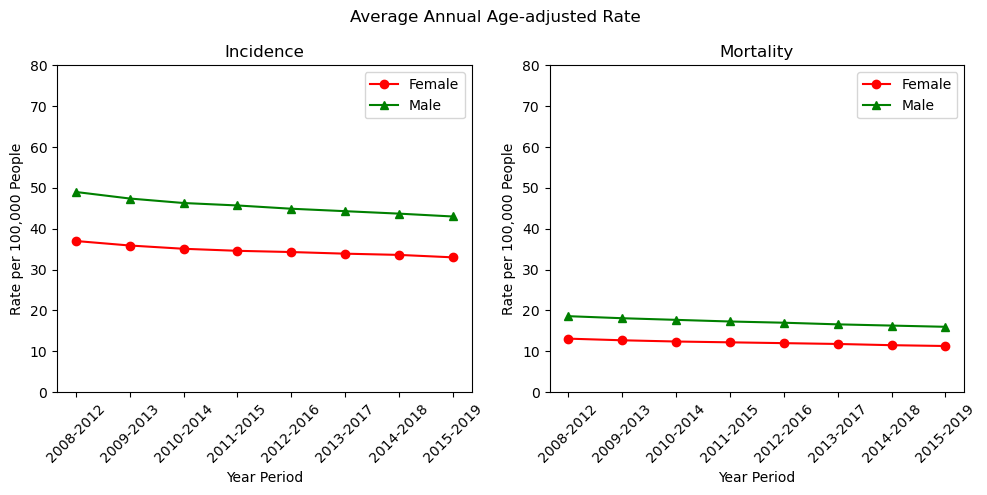

In [38]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Female
# # Plot Average Annual Number
# axes[0][0].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'], marker='o', label='Female',color='red')
# axes[0][0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Number'], marker='o', label='Male',color='green')
# axes[0][0].set_title('Incidence - Average Annual Number')
# axes[0][0].set_ylabel('Count')
# axes[0][0].set_xlabel('Year Period')
# axes[0][0].tick_params(axis='x', rotation=45)
# axes[0][0].grid(True)
# axes[0][0].set_ylim(0,80000)


# Plot Average Annual Age-adjusted Rate
axes[0].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Age-adjusted Rate'], marker='o', label='Female',color='red')
axes[0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), incidence']['Average Annual Age-adjusted Rate'], marker='^', label='Male',color='green')
axes[0].set_title('Incidence')
axes[0].set_ylabel('Rate per 100,000 People')
axes[0].set_xlabel('Year Period')
axes[0].tick_params(axis='x', rotation=45)
# axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}%'))
axes[0].legend()
axes[0].set_ylim(0,80)

# Male
# # Plot Average Annual Number
# axes[1][0].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'], marker='o', label='Female',color='red')
# axes[1][0].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Number'], marker='o', label='Male',color='green')
# axes[1][0].set_title('Mortality - Average Annual Number')
# axes[1][0].set_ylabel('Count')
# axes[1][0].set_xlabel('Year Period')
# axes[1][0].tick_params(axis='x', rotation=45)
# axes[1][0].legend()
# axes[1][0].set_ylim(0,80000)


# Plot Average Annual Age-adjusted Rate
axes[1].plot(colon_us_gender['Female']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Age-adjusted Rate'], marker='o', label='Female',color='red')
axes[1].plot(colon_us_gender['Male']['Cancer of the colon and rectum (colorectal), mortality']['Average Annual Age-adjusted Rate'], marker='^', label='Male',color='green')
axes[1].set_title('Mortality')
axes[1].set_ylabel('Rate per 100,000 People')
axes[1].set_xlabel('Year Period')
axes[1].tick_params(axis='x', rotation=45)
# axes[1][1].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}%'))
axes[1].legend()
axes[1].set_ylim(0,80)

# # Add main title
fig.suptitle('Average Annual Age-adjusted Rate', fontsize=12)

# # Add legend only showing "mortality" and "incidence"
# handles, labels = axes[0].get_legend_handles_labels()
# filtered_handles = []
# filtered_labels = []
# for handle, label in zip(handles, labels):
#     if 'Female' in label or 'Male' in label:
#         filtered_handles.append(handle)
#         filtered_labels.append(label)
# fig.legend(filtered_handles, filtered_labels)

plt.tight_layout()
plt.show()

Colon Cancer breakdown by Race and U.S Heatmap 

In [39]:
CDI_cancer.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'GeoLocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')

In [40]:

#Filter Data for Colon Cancer 
colon = CDI_cancer[(CDI_cancer['Question']== 'Cancer of the colon and rectum (colorectal), incidence') 
           | (CDI_cancer['Question'] ==  'Cancer of the colon and rectum (colorectal), mortality')].reset_index(drop=True)

#drop columns not in use for analysis
colon = colon.drop(['LocationID', 'QuestionID', 'TopicID', 'Topic'], axis = 1)

#Filter dataframe for AVG Age-adjusted rate for our analysis
colon = colon[(colon['DataValueType']== 'Average Annual Age-adjusted Rate')].reset_index(drop=True)

#Create a new column to show the time period. 
colon['Time_Period'] = colon['YearStart'].astype(str) + '-' + colon['YearEnd'].astype(str)

#Just checking my previous codes 
#print(colon['Question'].value_counts())
#print(colon['DataValueUnit'].value_counts())
#colon.head()

#Create new dataframes, one for Overall U.S and one for Race/Ethnicity only. 
colon_overall = colon[(colon['StratificationCategory1']== 'Overall')].reset_index(drop=True)
colon_race = colon[(colon['StratificationCategory1']== 'Race/Ethnicity')].reset_index(drop=True)


In [41]:
#Filter out and create new dataframe for overall mortality and overall incidence. 

colon_overall_incidence = colon_overall[(colon_overall['Question']== 'Cancer of the colon and rectum (colorectal), incidence')]

colon_overall_mortality = colon_overall[(colon_overall['Question']== 'Cancer of the colon and rectum (colorectal), mortality')]

#Filter out and create new dataframe for mortality and incidence by race/ethnicity
colon_race_incidence = colon_race[(colon_race['Question']== 'Cancer of the colon and rectum (colorectal), incidence')]
colon_race_incidence_N = colon_race_incidence[colon_race_incidence['Stratification1']== 'American Indian or Alaska Native'].reset_index(drop=True)
colon_race_incidence_AA = colon_race_incidence[colon_race_incidence['Stratification1']== 'Asian or Pacific Islander'].reset_index(drop=True)
colon_race_incidence_B = colon_race_incidence[colon_race_incidence['Stratification1']== 'Black, non-Hispanic'].reset_index(drop=True)
colon_race_incidence_H = colon_race_incidence[colon_race_incidence['Stratification1']== 'Hispanic'].reset_index(drop=True)
colon_race_incidence_W = colon_race_incidence[colon_race_incidence['Stratification1']== 'White, non-Hispanic'].reset_index(drop=True)

colon_race_mortality = colon_race[(colon_race['Question']== 'Cancer of the colon and rectum (colorectal), mortality')]
colon_race_mortality_N = colon_race_mortality[colon_race_mortality['Stratification1']== 'American Indian or Alaska Native'].reset_index(drop=True)
colon_race_mortality_AA = colon_race_mortality[colon_race_mortality['Stratification1']== 'Asian or Pacific Islander'].reset_index(drop=True)
colon_race_mortality_B = colon_race_mortality[colon_race_mortality['Stratification1']== 'Black, non-Hispanic'].reset_index(drop=True)
colon_race_mortality_H = colon_race_mortality[colon_race_mortality['Stratification1']== 'Hispanic'].reset_index(drop=True)
colon_race_mortality_W = colon_race_mortality[colon_race_mortality['Stratification1']== 'White, non-Hispanic'].reset_index(drop=True)






In [42]:
#Keep only Time Period, Datavalue, and LocationDesc for the data frames. 
colon_overall_incidence_USA= colon_overall_incidence[['Time_Period', 'DataValue', 'LocationDesc']]

colon_overall_mortality_USA= colon_overall_mortality[['Time_Period', 'DataValue', 'LocationDesc']]

colon_race_incidence_N = colon_race_incidence_N[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_incidence_AA = colon_race_incidence_AA[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_incidence_B = colon_race_incidence_B[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_incidence_H = colon_race_incidence_H[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_incidence_W = colon_race_incidence_W[['Time_Period', 'DataValue', 'LocationDesc']]

colon_race_mortality_N = colon_race_mortality_N[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_mortality_AA = colon_race_mortality_AA[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_mortality_B = colon_race_mortality_B[['Time_Period', 'DataValue', 'LocationDesc']]
colon_race_mortality_H = colon_race_mortality_H[['Time_Period', 'DataValue','LocationDesc']]
colon_race_mortality_W = colon_race_mortality_W[['Time_Period', 'DataValue', 'LocationDesc']]


In [43]:
#keep age adjusted rate for U.S Overall per ethnicity 

colon_race_mortality_N = colon_race_mortality_N[(colon_race_mortality_N['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_mortality_AA = colon_race_mortality_AA[(colon_race_mortality_AA['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_mortality_B = colon_race_mortality_B[(colon_race_mortality_B['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_mortality_H = colon_race_mortality_H[(colon_race_mortality_H['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_mortality_W = colon_race_mortality_W[(colon_race_mortality_W['LocationDesc']=='United States')].drop('LocationDesc', axis =1)

colon_race_incidence_N = colon_race_incidence_N[(colon_race_incidence_N['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_incidence_AA = colon_race_incidence_AA[(colon_race_incidence_AA['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_incidence_B = colon_race_incidence_B[(colon_race_incidence_B['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_incidence_H = colon_race_incidence_H[(colon_race_incidence_H['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
colon_race_incidence_W = colon_race_incidence_W[(colon_race_incidence_W['LocationDesc']=='United States')].drop('LocationDesc', axis =1)



In [44]:
#Rename columns and set index to time period


colon_race_incidence_N = colon_race_incidence_N.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
colon_race_incidence_AA = colon_race_incidence_AA.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
colon_race_incidence_B = colon_race_incidence_B.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
colon_race_incidence_H = colon_race_incidence_H.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
colon_race_incidence_W = colon_race_incidence_W.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])

colon_race_mortality_N = colon_race_mortality_N.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
colon_race_mortality_AA = colon_race_mortality_AA.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
colon_race_mortality_B = colon_race_mortality_B.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
colon_race_mortality_H = colon_race_mortality_H.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
colon_race_mortality_W = colon_race_mortality_W.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])


In [45]:
colon_race_mortality_W

,MortalityRate
Time_Period,
2014-2018,13.60
2010-2014,14.60
2009-2013,14.90
2013-2017,13.80
2012-2016,14.10
2008-2012,15.20
2011-2015,14.30
2015-2019,13.40


In [46]:
#Concat race incidence and race mortality 

Colon_race_N= pd.concat([colon_race_incidence_N, colon_race_mortality_N['MortalityRate']], axis =1)
Colon_race_AA= pd.concat([colon_race_incidence_AA, colon_race_mortality_AA['MortalityRate']], axis =1)
Colon_race_B= pd.concat([colon_race_incidence_B, colon_race_mortality_B['MortalityRate']], axis =1)
Colon_race_H= pd.concat([colon_race_incidence_H, colon_race_mortality_H['MortalityRate']], axis =1)
Colon_race_W= pd.concat([colon_race_incidence_W, colon_race_mortality_W['MortalityRate']], axis =1)



In [47]:
#Sort index (years) to be in chronological order
Colon_race_N= Colon_race_N.sort_index()
Colon_race_AA= Colon_race_AA.sort_index()
Colon_race_B= Colon_race_B.sort_index()
Colon_race_H= Colon_race_H.sort_index()
Colon_race_W= Colon_race_W.sort_index()

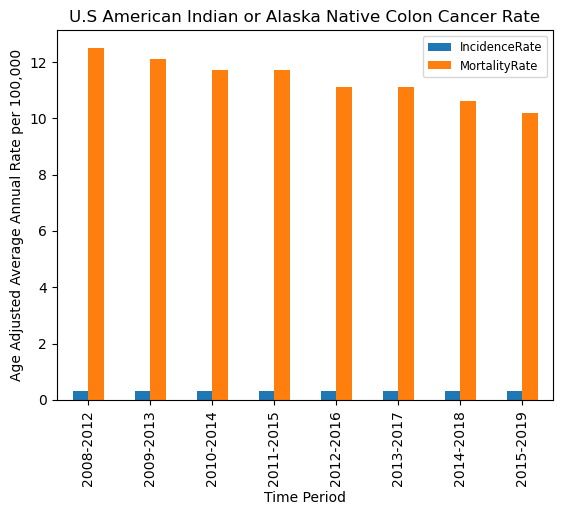

In [48]:
#create bar chart for U.S American Indian or Alaska Native Colon Cancer Rate

ax1 = Colon_race_N.plot.bar()  
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax1.set_title('U.S American Indian or Alaska Native Colon Cancer Rate')
ax1.legend(fontsize='small')


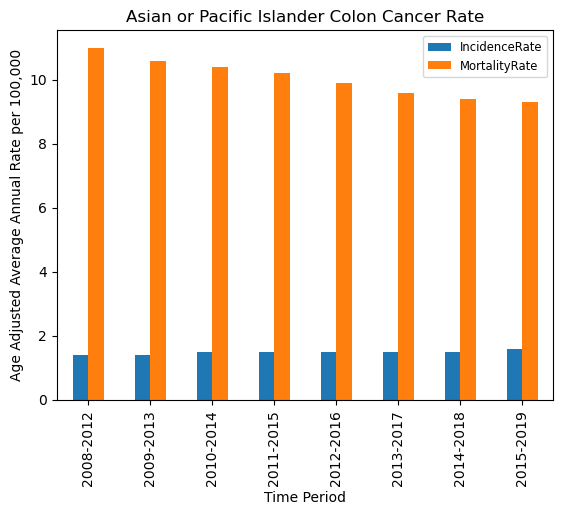

In [49]:
#create bar chart for Asian or Pacific Islander Colon Cancer Rate

ax2 = Colon_race_AA.plot.bar()  
ax2.set_xlabel('Time Period')
ax2.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax2.set_title('Asian or Pacific Islander Colon Cancer Rate')
ax2.legend(fontsize='small')

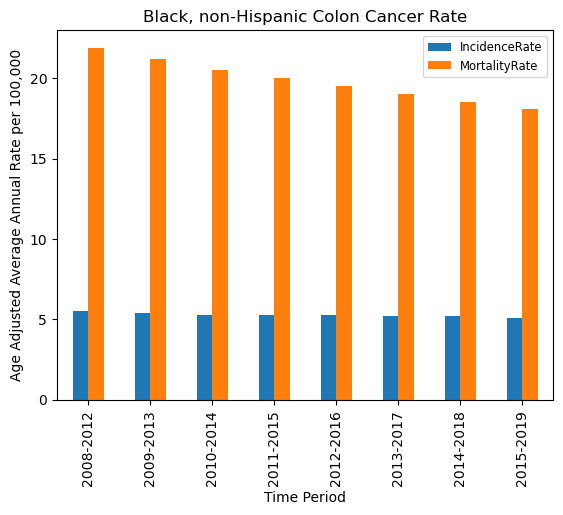

In [50]:
#create bar chart for Black, non-Hispanic Colon Cancer Rate

ax3 = Colon_race_B.plot.bar()  
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax3.set_title('Black, non-Hispanic Colon Cancer Rate')
ax3.legend(fontsize='small')

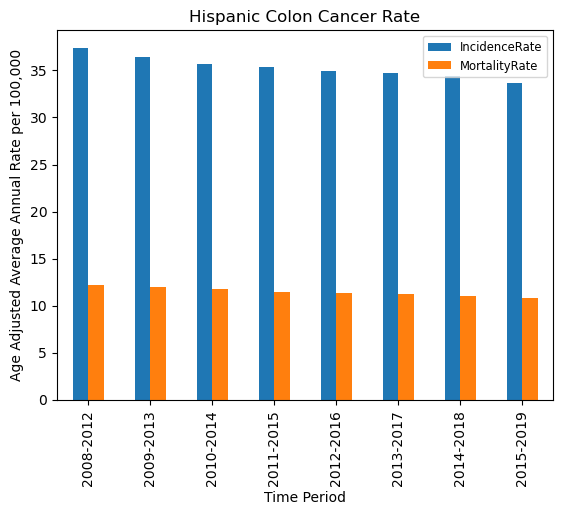

In [51]:
#create bar chart for Hispanic Colon Cancer Rate


ax4 = Colon_race_H.plot.bar()  
ax4.set_xlabel('Time Period')
ax4.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax4.set_title('Hispanic Colon Cancer Rate')
ax4.legend(fontsize='small')

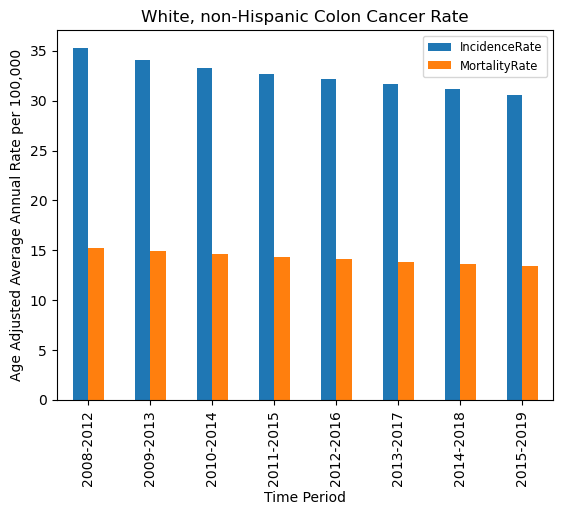

In [52]:
#create bar chart for White, non-Hispanic Colon Cancer Rate

ax5 = Colon_race_W.plot.bar()  
ax5.set_xlabel('Time Period')
ax5.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax5.set_title('White, non-Hispanic Colon Cancer Rate')
ax5.legend(fontsize='small')

In [53]:
#Create dataframe to be used for heatmap

colon_map1 = colon_overall_incidence[(colon_overall_incidence['Time_Period']== '2015-2019')].reset_index(drop=True)
colon_map1 =colon_map1[['LocationAbbr' ,'DataValue']]

colon_map2 = colon_overall_mortality[(colon_overall_mortality['Time_Period']== '2015-2019')].reset_index(drop=True)
colon_map2 =colon_map2[['LocationAbbr' ,'DataValue']]


In [54]:
#heatmap for U.S colon cancer incidence rate for overall population from 2015-2019

fig = go.Figure(data=go.Choropleth(
     locations=colon_map1['LocationAbbr'],
     locationmode = 'USA-states',
     z= colon_map1['DataValue'],
     colorscale = 'Reds',
     autocolorscale = False,
     text =colon_map1['LocationAbbr'],
     marker_line_color = 'white',
     colorbar_title = "Average Annual Age-adjusted Rate per 100,000"))

fig.update_layout(
    title_text = "Colon Cancer Incidence Rate [2015-19]", 
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True, 
        lakecolor = 'rgb(255, 255, 255)'),
)

fig.show()

In [55]:
#heatmap for U.S colon cancer mortality rate for overall population from 2015-2019
fig = go.Figure(data=go.Choropleth(
     locations=colon_map2['LocationAbbr'],
     locationmode = 'USA-states',
     z= colon_map2['DataValue'],
     colorscale = 'Reds',
     autocolorscale = False,
     text =colon_map2['LocationAbbr'],
     marker_line_color = 'white',
     colorbar_title = "Average Annual Age-adjusted Rate per 100,000"))

fig.update_layout(
    title_text = "Colon Cancer Mortality Rate [2015-19]", 
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True, 
        lakecolor = 'rgb(255, 255, 255)'),
)

fig.show()


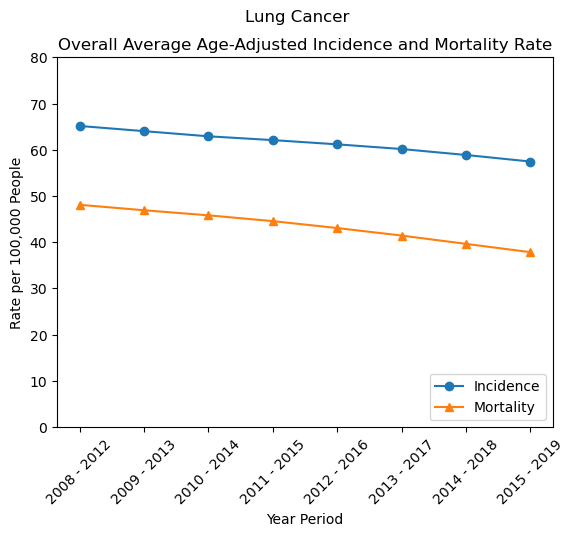

In [56]:
CDI_cancer = pd.read_csv('CDI_Cancer_Cleaned.csv')
index_values = ['2008 - 2012','2009 - 2013','2010 - 2014','2011 - 2015','2012 - 2016','2013 - 2017','2014 - 2018','2015 - 2019']

#Create the dataframes to be used in the plot
lung_cancer_incidence_total = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, incidence') & (CDI_cancer['Stratification1'] == 'Overall') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate')])
incidence_avg = lung_cancer_incidence_total['DataValueAlt'].groupby(lung_cancer_incidence_total['YearEnd']).sum() / lung_cancer_incidence_total['DataValue'].groupby(lung_cancer_incidence_total['YearEnd']).count()
incidence_avg = incidence_avg.set_axis(index_values)
lung_cancer_mortality_total = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, mortality') & (CDI_cancer['Stratification1'] == 'Overall') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate')])
mortality_avg = lung_cancer_mortality_total['DataValue'].groupby(lung_cancer_mortality_total['YearEnd']).sum() / lung_cancer_mortality_total['DataValue'].groupby(lung_cancer_mortality_total['YearEnd']).count()
mortality_avg = mortality_avg.set_axis(index_values)


fig_rate_lung, ax_rate_lung = plt.subplots()

fig_rate_lung.suptitle('Lung Cancer')

ax_rate_lung.set_title('Overall Average Age-Adjusted Incidence and Mortality Rate')
ax_rate_lung.plot(incidence_avg, marker ='o', label='incidence')
ax_rate_lung.plot(mortality_avg, marker = '^',label='mortality')
ax_rate_lung.set_ylim(0,80)
ax_rate_lung.set_xlabel('Year Period')
ax_rate_lung.set_ylabel('Rate per 100,000 People')

ax_rate_lung.tick_params(axis='x', labelrotation=45)
ax_rate_lung.legend(['Incidence', 'Mortality'],loc='lower right')


#fig_rate_lung.legend(['Incidence', 'Mortality'], loc='upper left')


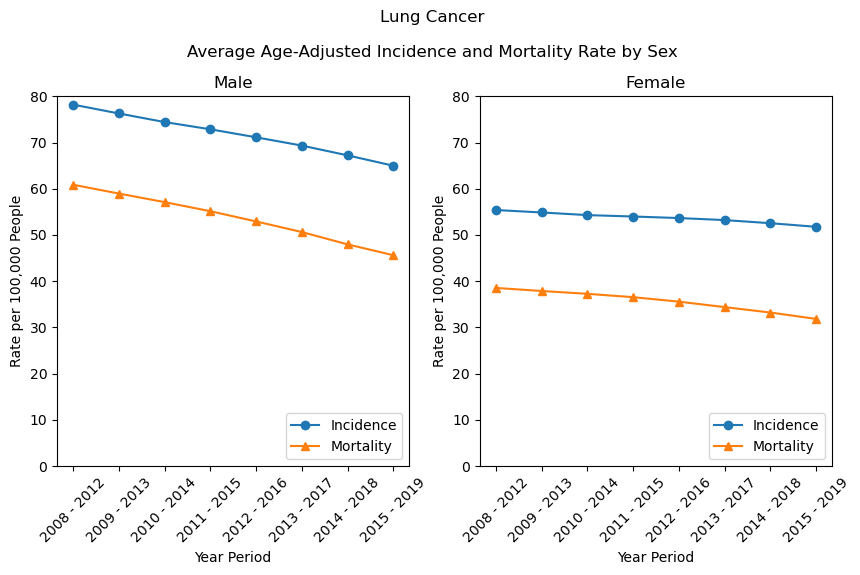

In [57]:
CDI_cancer = pd.read_csv('CDI_Cancer_Cleaned.csv')

index_values = ['2008 - 2012','2009 - 2013','2010 - 2014','2011 - 2015','2012 - 2016','2013 - 2017','2014 - 2018','2015 - 2019']

#Create the dataframes to be used in the plot
lung_cancer_incidence_male = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, incidence') & (CDI_cancer['Stratification1'] == 'Male') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate')])
male_incidence_avg = lung_cancer_incidence_male['DataValue'].groupby(lung_cancer_incidence_male['YearEnd']).sum() / lung_cancer_incidence_male['DataValue'].groupby(lung_cancer_incidence_male['YearEnd']).count()
male_incidence_avg = male_incidence_avg.set_axis(index_values)
lung_cancer_mortality_male = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, mortality') & (CDI_cancer['Stratification1'] == 'Male') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate')])
male_mortality_avg = lung_cancer_mortality_male['DataValue'].groupby(lung_cancer_mortality_male['YearEnd']).sum() / lung_cancer_mortality_male['DataValue'].groupby(lung_cancer_mortality_male['YearEnd']).count()
male_mortality_avg = male_mortality_avg.set_axis(index_values)

lung_cancer_incidence_female = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, incidence') & (CDI_cancer['Stratification1'] == 'Female') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate')])
female_incidence_avg = lung_cancer_incidence_female['DataValueAlt'].groupby(lung_cancer_incidence_female['YearEnd']).sum() / lung_cancer_incidence_male['DataValue'].groupby(lung_cancer_incidence_male['YearEnd']).count()
female_incidence_avg = female_incidence_avg.set_axis(index_values)
lung_cancer_mortality_female = pd.DataFrame(CDI_cancer[(CDI_cancer['Question'] == 'Cancer of the lung and bronchus, mortality') & (CDI_cancer['Stratification1'] == 'Female') & (CDI_cancer['DataValueType'] == 'Average Annual Age-adjusted Rate') & (CDI_cancer['Stratification1'] == 'Female')])
female_mortality_avg = lung_cancer_mortality_female['DataValueAlt'].groupby(lung_cancer_mortality_female['YearEnd']).sum() / lung_cancer_mortality_female['DataValue'].groupby(lung_cancer_mortality_female['YearEnd']).count()
female_mortality_avg = female_mortality_avg.set_axis(index_values)

fig_lung, (ax_male_lung, ax_female_lung) = plt.subplots(1,2)

fig_lung.suptitle('Lung Cancer\n\nAverage Age-Adjusted Incidence and Mortality Rate by Sex',y=1.06)
fig_lung.set_figwidth(10)

ax_male_lung.set_title('Male')
ax_female_lung.set_title('Female')
ax_male_lung.plot(male_incidence_avg, marker ='o', label='Incidence')
ax_male_lung.plot(male_mortality_avg, marker = '^',label='Mortality')
ax_male_lung.set_ylim(0,80)
ax_male_lung.set_ylabel('Rate per 100,000 People')
ax_male_lung.set_xlabel('Year Period')
ax_male_lung.tick_params(axis='x', labelrotation=45)

ax_female_lung.plot(female_incidence_avg, marker ='o')
ax_female_lung.plot(female_mortality_avg, marker = '^')
ax_female_lung.set_ylim(0,80)
ax_female_lung.set_ylabel('Rate per 100,000 People')
ax_female_lung.set_xlabel('Year Period')
ax_female_lung.tick_params(axis='x', labelrotation=45)

ax_female_lung.legend(['Incidence', 'Mortality'], loc='lower right')
ax_male_lung.legend(['Incidence', 'Mortality'], loc='lower right')

## Lung Cancer by Race

In [58]:

#Filter Data for Lung Cancer 
lung = CDI_cancer[(CDI_cancer['Question']== 'Cancer of the lung and bronchus, incidence') 
           | (CDI_cancer['Question'] ==  'Cancer of the lung and bronchus, mortality')].reset_index(drop=True)


#drop columns not in use for analysis
lung = lung.drop(['LocationID', 'QuestionID', 'TopicID', 'Topic'], axis = 1)

#Filter dataframe for AVG Age-adjusted rate for our analysis
lung = lung[(lung['DataValueType']== 'Average Annual Age-adjusted Rate')].reset_index(drop=True)

#Create a new column to show the time period. 
lung['Time_Period'] = lung['YearStart'].astype(str) + '-' + lung['YearEnd'].astype(str)

#Create new dataframes, one for Overall U.S and one for Race/Ethnicity only. 
lung_overall = lung[(lung['StratificationCategory1']== 'Overall')].reset_index(drop=True)
lung_race = lung[(lung['StratificationCategory1']== 'Race/Ethnicity')].reset_index(drop=True)



lung.head()


,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,...,StratificationCategory1,Stratification1,GeoLocation,DataValueTypeID,StratificationCategoryID1,StratificationID1,longitude,latitude,YearPeriod,Time_Period
0,107791,2009,2013,CA,California,Statewide central cancer registries,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,54.40,...,Race/Ethnicity,"White, non-Hispanic",-120.99999953799971 37.63864012300047,AVGANNAGEADJRATE,RACE,WHT,-121.00,37.64,2009-2013,2009-2013
1,107827,2013,2017,CA,California,Statewide central cancer registries,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,48.20,...,Race/Ethnicity,"White, non-Hispanic",-120.99999953799971 37.63864012300047,AVGANNAGEADJRATE,RACE,WHT,-121.00,37.64,2013-2017,2013-2017
2,107835,2010,2014,CT,Connecticut,Statewide central cancer registries,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,57.20,...,Race/Ethnicity,"Black, non-Hispanic",-72.64984095199964 41.56266102000046,AVGANNAGEADJRATE,RACE,BLK,-72.65,41.56,2010-2014,2010-2014
3,107865,2011,2015,CO,Colorado,Statewide central cancer registries,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,47.30,...,Gender,Male,-106.13361092099967 38.843840757000464,AVGANNAGEADJRATE,GENDER,GENM,-106.13,38.84,2011-2015,2011-2015
4,107881,2012,2016,AR,Arkansas,Statewide central cancer registries,"Cancer of the lung and bronchus, incidence","per 100,000",Average Annual Age-adjusted Rate,39.60,...,Race/Ethnicity,Hispanic,-92.27449074299966 34.74865012400045,AVGANNAGEADJRATE,RACE,HIS,-92.27,34.75,2012-2016,2012-2016


In [59]:
#Filter out and create new dataframe for overall mortality and overall incidence. 

lung_overall_incidence = lung_overall[(lung_overall['Question']== 'Cancer of the lung and bronchus, incidence')]

lung_overall_mortality = lung_overall[(lung_overall['Question']== 'Cancer of the lung and bronchus, mortality')]

#Filter out and create new dataframe for mortality and incidence by race/ethnicity
lung_race_incidence = lung_race[(lung_race['Question']== 'Cancer of the lung and bronchus, incidence')]
lung_race_incidence_N = lung_race_incidence[lung_race_incidence['Stratification1']== 'American Indian or Alaska Native'].reset_index(drop=True)
lung_race_incidence_AA = lung_race_incidence[lung_race_incidence['Stratification1']== 'Asian or Pacific Islander'].reset_index(drop=True)
lung_race_incidence_B = lung_race_incidence[lung_race_incidence['Stratification1']== 'Black, non-Hispanic'].reset_index(drop=True)
lung_race_incidence_H = lung_race_incidence[lung_race_incidence['Stratification1']== 'Hispanic'].reset_index(drop=True)
lung_race_incidence_W = lung_race_incidence[lung_race_incidence['Stratification1']== 'White, non-Hispanic'].reset_index(drop=True)

lung_race_mortality = lung_race[(lung_race['Question']== 'Cancer of the lung and bronchus, mortality')]
lung_race_mortality_N = lung_race_mortality[lung_race_mortality['Stratification1']== 'American Indian or Alaska Native'].reset_index(drop=True)
lung_race_mortality_AA = lung_race_mortality[lung_race_mortality['Stratification1']== 'Asian or Pacific Islander'].reset_index(drop=True)
lung_race_mortality_B = lung_race_mortality[lung_race_mortality['Stratification1']== 'Black, non-Hispanic'].reset_index(drop=True)
lung_race_mortality_H = lung_race_mortality[lung_race_mortality['Stratification1']== 'Hispanic'].reset_index(drop=True)
lung_race_mortality_W = lung_race_mortality[lung_race_mortality['Stratification1']== 'White, non-Hispanic'].reset_index(drop=True)






In [60]:
#Keep only Time Period, Datavalue, and LocationDesc for the data frames. 
lung_overall_incidence_USA= lung_overall_incidence[['Time_Period', 'DataValue', 'LocationDesc']]

lung_overall_mortality_USA= lung_overall_mortality[['Time_Period', 'DataValue', 'LocationDesc']]

lung_race_incidence_N = lung_race_incidence_N[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_incidence_AA = lung_race_incidence_AA[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_incidence_B = lung_race_incidence_B[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_incidence_H = lung_race_incidence_H[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_incidence_W = lung_race_incidence_W[['Time_Period', 'DataValue', 'LocationDesc']]

lung_race_mortality_N = lung_race_mortality_N[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_mortality_AA = lung_race_mortality_AA[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_mortality_B = lung_race_mortality_B[['Time_Period', 'DataValue', 'LocationDesc']]
lung_race_mortality_H = lung_race_mortality_H[['Time_Period', 'DataValue','LocationDesc']]
lung_race_mortality_W = lung_race_mortality_W[['Time_Period', 'DataValue', 'LocationDesc']]



In [61]:
#keep age adjusted rate for U.S Overall per ethnicity 

lung_race_incidence_N = lung_race_incidence_N[(lung_race_incidence_N['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_incidence_AA = lung_race_incidence_AA[(lung_race_incidence_AA['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_incidence_B = lung_race_incidence_B[(lung_race_incidence_B['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_incidence_H = lung_race_incidence_H[(lung_race_incidence_H['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_incidence_W = lung_race_incidence_W[(lung_race_incidence_W['LocationDesc']=='United States')].drop('LocationDesc', axis =1)


lung_race_mortality_N = lung_race_mortality_N[(lung_race_mortality_N['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_mortality_AA = lung_race_mortality_AA[(lung_race_mortality_AA['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_mortality_B = lung_race_mortality_B[(lung_race_mortality_B['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_mortality_H = lung_race_mortality_H[(lung_race_mortality_H['LocationDesc']=='United States')].drop('LocationDesc', axis =1)
lung_race_mortality_W = lung_race_mortality_W[(lung_race_mortality_W['LocationDesc']=='United States')].drop('LocationDesc', axis =1)



In [62]:
#Rename columns and set index to time period


lung_race_incidence_N = lung_race_incidence_N.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
lung_race_incidence_AA = lung_race_incidence_AA.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
lung_race_incidence_B = lung_race_incidence_B.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
lung_race_incidence_H = lung_race_incidence_H.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])
lung_race_incidence_W = lung_race_incidence_W.rename(columns={'DataValue': 'IncidenceRate'}).set_index(['Time_Period'])

lung_race_mortality_N = lung_race_mortality_N.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
lung_race_mortality_AA = lung_race_mortality_AA.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
lung_race_mortality_B = lung_race_mortality_B.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
lung_race_mortality_H = lung_race_mortality_H.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])
lung_race_mortality_W = lung_race_mortality_W.rename(columns={'DataValue': 'MortalityRate'}).set_index(['Time_Period'])


In [63]:
#Concat race incidence and race mortality 

Lung_race_N= pd.concat([lung_race_incidence_N, lung_race_mortality_N['MortalityRate']], axis =1)
Lung_race_AA= pd.concat([lung_race_incidence_AA, lung_race_mortality_AA['MortalityRate']], axis =1)
Lung_race_B= pd.concat([lung_race_incidence_B, lung_race_mortality_B['MortalityRate']], axis =1)
Lung_race_H= pd.concat([lung_race_incidence_H, lung_race_mortality_H['MortalityRate']], axis =1)
Lung_race_W= pd.concat([lung_race_incidence_W, lung_race_mortality_W['MortalityRate']], axis =1)


#Sort by index for chronological order 
Lung_race_N= Lung_race_N.sort_index()
Lung_race_AA= Lung_race_AA.sort_index()
Lung_race_B= Lung_race_B.sort_index()
Lung_race_H= Lung_race_H.sort_index()
Lung_race_W= Lung_race_W.sort_index()



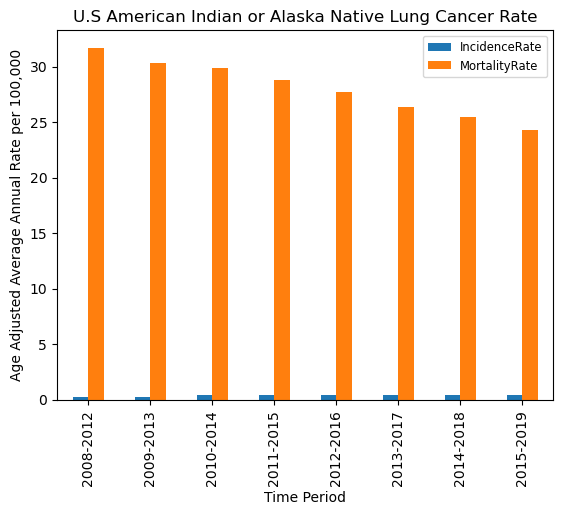

In [64]:
#create bar chart for U.S American Indian or Alaska Native Lung Cancer Rate

ax1 = Lung_race_N.plot.bar()  
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax1.set_title('U.S American Indian or Alaska Native Lung Cancer Rate')
ax1.legend(fontsize='small')


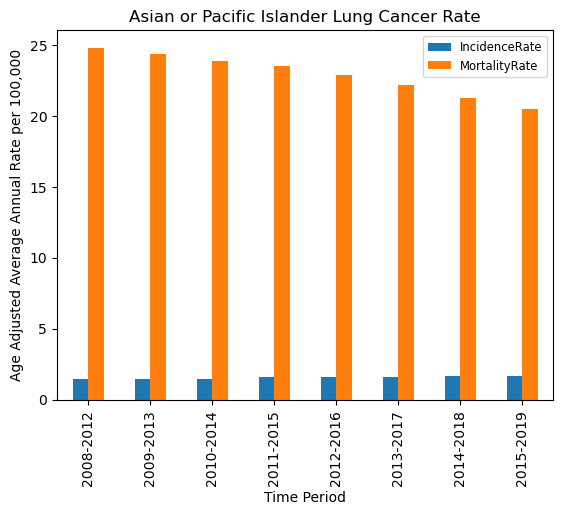

In [65]:
#create bar chart for Asian or Pacific Islander Lung Cancer Rate

ax2 = Lung_race_AA.plot.bar()  
ax2.set_xlabel('Time Period')
ax2.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax2.set_title('Asian or Pacific Islander Lung Cancer Rate')
ax2.legend(fontsize='small')

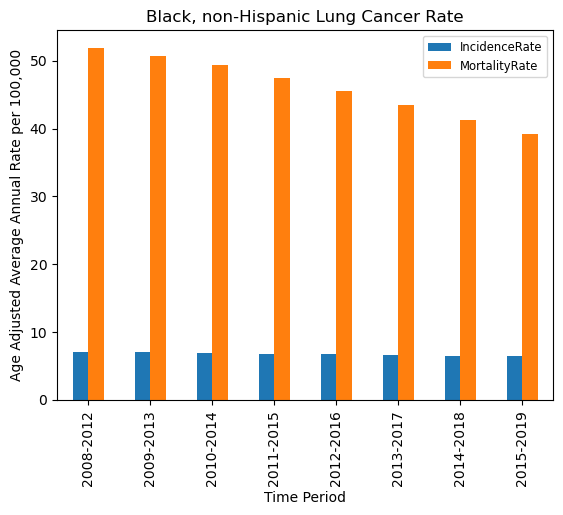

In [66]:
#create bar chart for Black, non-Hispanic Lung Cancer Rate

ax3 = Lung_race_B.plot.bar()  
ax3.set_xlabel('Time Period')
ax3.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax3.set_title('Black, non-Hispanic Lung Cancer Rate')
ax3.legend(fontsize='small')

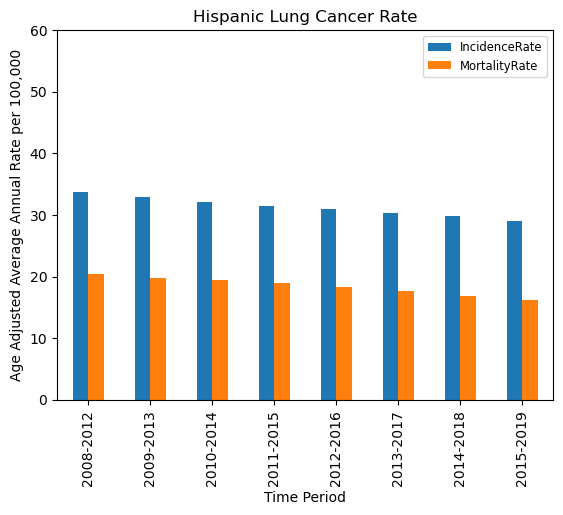

In [67]:
#create bar chart for Hispanic Lung Cancer Rate


ax4 = Lung_race_H.plot.bar()  
ax4.set_xlabel('Time Period')
ax4.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax4.set_title('Hispanic Lung Cancer Rate')
ax4.set_ylim([0,60])
ax4.legend(fontsize='small')

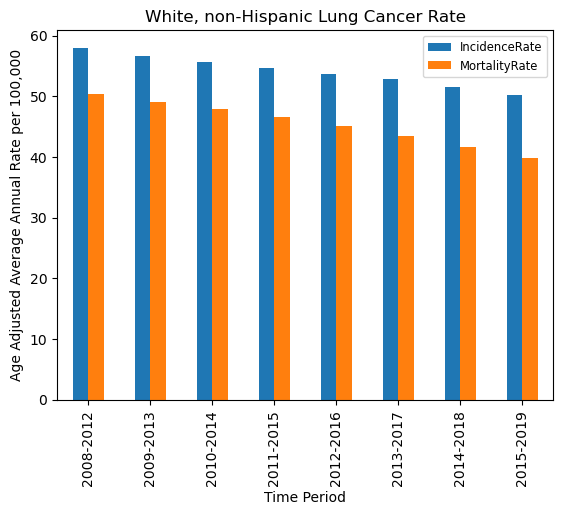

In [68]:
#create bar chart for White, non-Hispanic Lung Cancer Rate

ax5 = Lung_race_W.plot.bar()  
ax5.set_xlabel('Time Period')
ax5.set_ylabel('Age Adjusted Average Annual Rate per 100,000')
ax5.set_title('White, non-Hispanic Lung Cancer Rate')
ax5.legend(fontsize='small')

In [69]:
#Create dataframe to be used for heatmap

lung_map1 = lung_overall_incidence[(lung_overall_incidence['Time_Period']== '2015-2019')].reset_index(drop=True)
lung_map1 =lung_map1[['LocationAbbr' ,'DataValue']]

lung_map2 = lung_overall_mortality[(lung_overall_mortality['Time_Period']== '2015-2019')].reset_index(drop=True)
lung_map2 =lung_map2[['LocationAbbr' ,'DataValue']]


In [70]:
#heatmap for U.S lung cancer incidence rate for overall population from 2015-2019

fig = go.Figure(data=go.Choropleth(
     locations=lung_map1['LocationAbbr'],
     locationmode = 'USA-states',
     z= lung_map1['DataValue'],
     colorscale = 'Reds',
     autocolorscale = False,
     text =colon_map1['LocationAbbr'],
     marker_line_color = 'white',
     colorbar_title = "Average Annual Age-adjusted Rate per 100,000"))

fig.update_layout(
    title_text = "Lung Cancer Incidence Rate [2015-19]", 
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True, 
        lakecolor = 'rgb(255, 255, 255)'),
)

fig.show()

In [71]:
#heatmap for U.S colon cancer mortality rate for overall population from 2015-2019
fig = go.Figure(data=go.Choropleth(
     locations=lung_map2['LocationAbbr'],
     locationmode = 'USA-states',
     z= lung_map2['DataValue'],
     colorscale = 'Reds',
     autocolorscale = False,
     text =lung_map2['LocationAbbr'],
     marker_line_color = 'white',
     colorbar_title = "Average Annual Age-adjusted Rate per 100,000"))

fig.update_layout(
    title_text = "Lung Cancer Mortality Rate [2015-19]", 
    geo = dict(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True, 
        lakecolor = 'rgb(255, 255, 255)'),
)

fig.show()
